In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import pingouin as pg

In [2]:
connection = mysql.connector.connect(
    host='localhost',
    username='root',
    password='password',
    database='naxos_db'
)

query = """
SELECT
    a.catalogue_no,
    a.label,
    a.release_date,
    YEAR(a.release_date) AS release_year,
    r.person_id,
    p.name,
    p.gender,
    r.role
FROM Person AS p
JOIN AlbumRole AS r ON r.person_id = p.id
JOIN Album AS a ON a.catalogue_no = r.album_catalogue_no
WHERE release_date IS NOT NULL
    AND YEAR(a.release_date) BETWEEN 1990 AND 2023
ORDER BY release_year DESC, a.catalogue_no, r.role
"""

df = pd.read_sql(query, connection)
connection.close()

df.head()

C:\Users\jakob\AppData\Local\Temp\ipykernel_5824\82612549.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,catalogue_no,label,release_date,release_year,person_id,name,gender,role
0,11183-2,White Cloud,2023-12-01,2023,1039,"Pritchard, Peter",male,composer
1,11183-2,White Cloud,2023-12-01,2023,1039,"Pritchard, Peter",male,artist
2,11184-2,White Cloud,2023-12-01,2023,1039,"Pritchard, Peter",male,composer
3,11184-2,White Cloud,2023-12-01,2023,1039,"Pritchard, Peter",male,artist
4,2.110681-82,Naxos,2023-01-01,2023,17648,"Bach, Johann Sebastian",male,composer


In [3]:
# Group by year of publication
grouped = df.value_counts(['release_year', 'role', 'gender']).unstack(fill_value=0)
grouped = grouped.stack().reset_index(name='person_count')

# Get history for different (role, gender) subgroups
artist_f = grouped.query('role == "artist" and gender == "female"').person_count
artist_m = grouped.query('role == "artist" and gender == "male"').person_count
composer_f = grouped.query('role == "composer" and gender == "female"').person_count
composer_m = grouped.query('role == "composer" and gender == "male"').person_count
conductor_f = grouped.query('role == "conductor" and gender == "female"').person_count
conductor_m = grouped.query('role == "conductor" and gender == "male"').person_count
lyricist_f = grouped.query('role == "lyricist" and gender == "female"').person_count
lyricist_m = grouped.query('role == "lyricist" and gender == "male"').person_count
arranger_f = grouped.query('role == "arranger" and gender == "female"').person_count
arranger_m = grouped.query('role == "arranger" and gender == "male"').person_count

# Years and color palette
x = list(range(1990, 2024))
color_palette = plt.get_cmap('tab10').colors

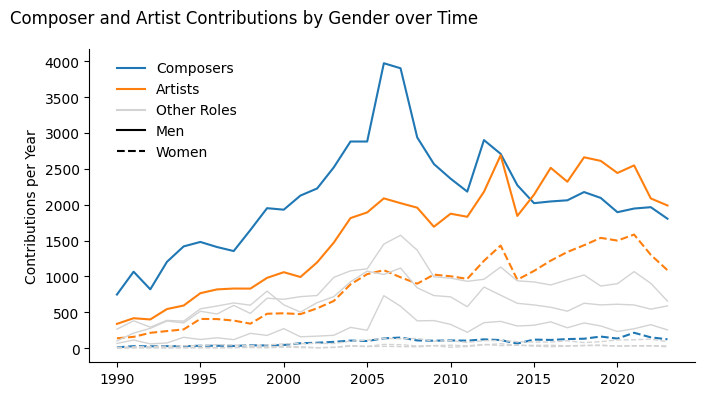

In [4]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)

# Data for composers and artists
ax.plot(x, composer_m, color=color_palette[0])
ax.plot(x, composer_f, color=color_palette[0], linestyle='dashed')
ax.plot(x, artist_m, color=color_palette[1])
ax.plot(x, artist_f, color=color_palette[1], linestyle='dashed')

# Data for other roles
ax.plot(x, conductor_m, color='lightgrey', linewidth=1)
ax.plot(x, conductor_f, color='lightgrey', linewidth=1, linestyle='dashed')
ax.plot(x, lyricist_m, color='lightgrey', linewidth=1)
ax.plot(x, lyricist_f, color='lightgrey', linewidth=1, linestyle='dashed')
ax.plot(x, arranger_m, color='lightgrey', linewidth=1)
ax.plot(x, arranger_f, color='lightgrey', linewidth=1, linestyle='dashed')

# Legend
legend_elements = [
    Line2D([0], [0], color=color_palette[0], lw=1.5, label='Composers'),
    Line2D([0], [0], color=color_palette[1], lw=1.5, label='Artists'),
    Line2D([0], [0], color='lightgrey', lw=1.5, label='Other Roles'),
    Line2D([0], [0], color='black', lw=1.5, label='Men', linestyle='-'),
    Line2D([0], [0], color='black', lw=1.5, label='Women', linestyle='--')
]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.025, 1), loc='upper left', frameon=False)

# Title
fig.suptitle('Composer and Artist Contributions by Gender over Time', fontsize=12, x=0, ha='left')

# Layout and style
ax.set_ylabel('Contributions per Year')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#fig.set_facecolor('#fffcf5')
#ax.set_facecolor('#fffcf5')

plt.tight_layout()
plt.show()

In [5]:
# Filter for composer role
comp_df = df.query('role == "composer"')

# Get history for different subsets
women = comp_df.query('gender == "female"').groupby('release_year').size()
bach = comp_df.query('name == "Bach, Johann Sebastian"').groupby('release_year').size()
mozart = comp_df.query('name == "Mozart, Wolfgang Amadeus"').groupby('release_year').size()
beethoven = comp_df.query('name == "Beethoven, Ludwig van"').groupby('release_year').size()

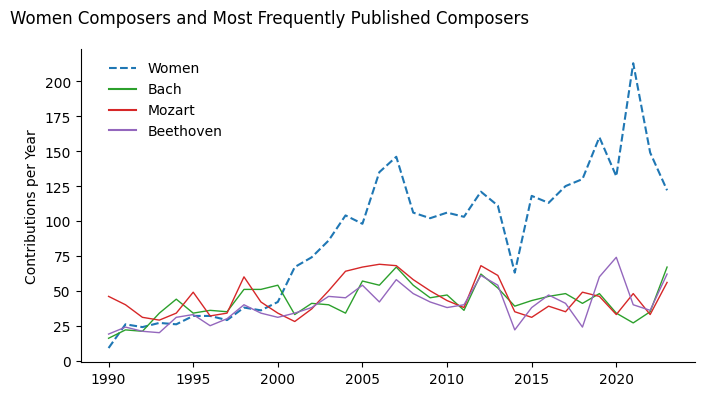

In [6]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)

# Data
ax.plot(x, women, color=color_palette[0], linestyle='dashed')
ax.plot(x, bach, color=color_palette[2], linewidth=1)
ax.plot(x, mozart, color=color_palette[3], linewidth=1)
ax.plot(x, beethoven, color=color_palette[4], linewidth=1)

# Legend
legend_elements2 = [
    Line2D([0], [0], color=color_palette[0], lw=1.5, linestyle='--', label='Women'),
    Line2D([0], [0], color=color_palette[2], lw=1.5, label='Bach'),
    Line2D([0], [0], color=color_palette[3], lw=1.5, label='Mozart'),
    Line2D([0], [0], color=color_palette[4], lw=1.5, label='Beethoven')
]
ax.legend(handles=legend_elements2, bbox_to_anchor=(0.025, 1), loc='upper left', frameon=False)

# Title
fig.suptitle('Women Composers and Most Frequently Published Composers', fontsize=12, x=0.0, ha='left')

# Layout and style
ax.set_ylabel('Contributions per Year')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#fig.set_facecolor('#fffcf5')
#ax.set_facecolor('#fffcf5')

plt.tight_layout()
plt.show()

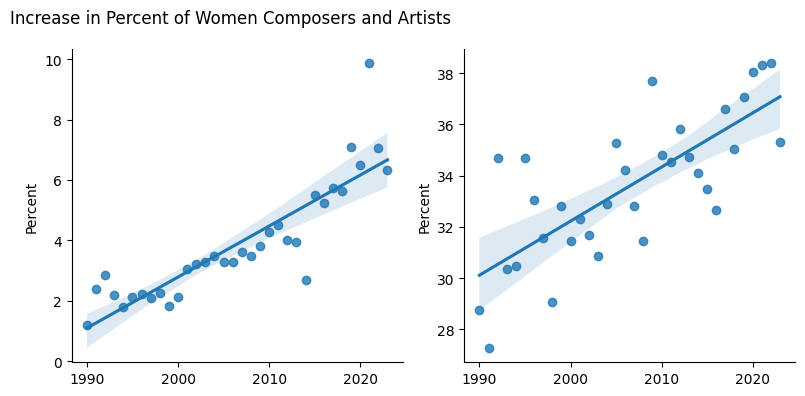

In [7]:
perc_fem_composers = ( composer_f.to_numpy() / (composer_f.to_numpy() + composer_m.to_numpy()) ) * 100
perc_fem_artists = ( artist_f.to_numpy() / (artist_f.to_numpy() + artist_m.to_numpy()) ) * 100


fig, axs = plt.subplots(1,2, figsize=(8,4))

sns.regplot(x=x, y=perc_fem_composers, ax=axs[0])
sns.regplot(x=x, y=perc_fem_artists, ax=axs[1])

for ax in [axs[0], axs[1]]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('Percent')

fig.suptitle('Increase in Percent of Women Composers and Artists', fontsize=12, x=0, ha='left')
plt.tight_layout()
plt.show()

In [8]:
reg_results = pg.linear_regression(x, perc_fem_composers)
year_of_equality = (50 - reg_results.loc[0, 'coef']) / reg_results.loc[1, 'coef']
year_of_equality = round(year_of_equality)

print(f'Expected year of equal gender representation for composers: {year_of_equality}')
reg_results

Expected year of equal gender representation for composers: 2280


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-334.800387,32.911816,-10.172650,1.488895e-11,0.767946,0.760695,-401.839562,-267.761211
1,x1,0.168793,0.016402,10.290732,1.119278e-11,0.767946,0.760695,0.135382,0.202203


In [9]:
reg_results = pg.linear_regression(x, perc_fem_artists)
year_of_equality = (50 - reg_results.loc[0, 'coef']) / reg_results.loc[1, 'coef']
year_of_equality = round(year_of_equality)

print(f'Expected year of equal gender representation for artists: {year_of_equality}')
reg_results

Expected year of equal gender representation for artists: 2084


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-389.653311,64.960443,-5.998317,1.090734e-06,0.570194,0.556762,-521.973403,-257.333219
1,x1,0.210938,0.032375,6.515533,2.461221e-07,0.570194,0.556762,0.144993,0.276883
